In [3]:
from numpy import sqrt
from numpy import asarray
from pandas import read_csv
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, models, layers, regularizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow_datasets as tfds
import tensorflow_hub as hub

from PIL import Image
import cv2

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn

In [ ]:
#load the data
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
len(X_test)

In [ ]:
X_train.shape

In [ ]:
plt.matshow(X_train[0])

In [ ]:
y_train[0]

In [ ]:
#normalize as the ML models performs better with the scaled data
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train[0]

In [ ]:
#build the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.summary()

In [ ]:
#compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#train the model
model.fit(X_train, y_train, epochs=5, verbose=2)

In [ ]:
#evaluate the model
model.evaluate(X_test, y_test)

In [ ]:
#print the confusion matrix
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Test the same with CNN

In [ ]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [ ]:
#build the CNN model
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), padding="valid", activation='relu', input_shape=(28,28,1), kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.summary()

In [ ]:
#compile the model
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#train the model
cnn.fit(X_train, y_train, epochs=5, verbose=2)

In [ ]:
#evaluate the model
cnn.evaluate(X_test, y_test)

In [ ]:
#print the confusion matrix
y_predicted = cnn.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#creating dense layer model

In [14]:
#get the data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28 * 28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype("float32") / 255.0

In [15]:
class MyAnnModel(keras.Model):
    def __init__(self):
        super(MyAnnModel, self).__init__()
        self.dense1 = layers.Dense(128, activation="relu")
        self.dense1 = layers.Dense(64, activation="relu")
        self.dense2 = layers.Dense(10)

    def call(self, input_tensor):
        x = tf.nn.relu(self.dense1(input_tensor))
        return self.dense2(x)

In [16]:
# Compile the model
ANN = MyAnnModel()
ANN.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
)

In [17]:
#train the model
ANN.fit(x_train, y_train, batch_size=32, epochs=2, verbose=2)

Epoch 1/2
1875/1875 - 4s - loss: 0.3064 - accuracy: 0.9136
Epoch 2/2
1875/1875 - 4s - loss: 0.1503 - accuracy: 0.9563


In [18]:
#evaluate the model
ANN.evaluate(x_test, y_test, batch_size=32, verbose=2)

313/313 - 1s - loss: 0.1365 - accuracy: 0.9591


[0.13652834296226501, 0.9591000080108643]

In [9]:
#Saving the model
ANN.save("saved_model/")

INFO:tensorflow:Assets written to: saved_model/assets


In [12]:
#loading the model
model_loaded = keras.models.load_model('saved_model/')

In [13]:
#print summary of the loaded model
model_loaded.summary()

Model: "my_ann_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              multiple                  50240     
_________________________________________________________________
dense_2 (Dense)              multiple                  650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [14]:
#test the loaded model
model_loaded.fit(x_train, y_train, batch_size=32, epochs=2, verbose=2)

Epoch 1/2
1875/1875 - 4s - loss: 0.1087 - accuracy: 0.9673
Epoch 2/2
1875/1875 - 4s - loss: 0.0840 - accuracy: 0.9746


In [15]:
#evaluate the loaded model
model_loaded.evaluate(x_test, y_test, batch_size=32, verbose=2)

313/313 - 1s - loss: 0.1024 - accuracy: 0.9690


[0.10241551697254181, 0.968999981880188]

Text(69.0, 0.5, 'Truth')

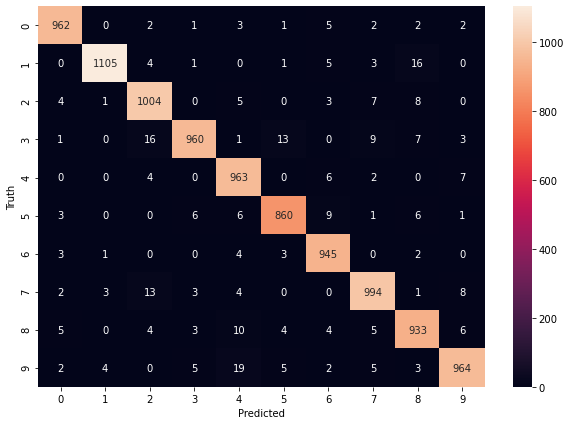

In [17]:
#print the confusion matrix
y_predicted = model_loaded.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [19]:
(ds_train, ds_test), ds_info = tfds.load(
    "mnist",
    split=["train", "test"],
    shuffle_files=True,
    as_supervised=True,  # will return tuple (img, label) otherwise dict
    with_info=True,  # able to get info about dataset
)

In [20]:
def normalize_img(image, label):
    """Normalizes images"""
    return tf.cast(image, tf.float32) / 255.0, label

In [21]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 128

# Setup for train dataset
ds_train = ds_train.map(normalize_img, num_parallel_calls=AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits["train"].num_examples)
ds_train = ds_train.batch(BATCH_SIZE)
ds_train = ds_train.prefetch(AUTOTUNE)

In [24]:
save_callback = keras.callbacks.ModelCheckpoint(
    "checkpoint/", save_weights_only=True, monitor="train_acc", save_best_only=False,)

lr_scheduler = keras.callbacks.ReduceLROnPlateau(
    monitor="loss", factor=0.1, patience=3, mode="max", verbose=1)


class OurOwnCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get("accuracy") > 1:
            print("Accuracy over 70%, quitting training")
            self.model.stop_training = True

In [25]:
#set up the model
model = keras.Sequential(
    [
        keras.Input((28, 28, 1)),
        layers.Conv2D(32, 3, activation="relu"),
        layers.Flatten(),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

In [26]:
#compile the model
model.compile(
    optimizer=keras.optimizers.Adam(0.01),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"],
)

In [27]:
#train the model
model.fit(
    ds_train,
    epochs=10,
    callbacks=[save_callback, lr_scheduler, OurOwnCallback()],
    verbose=2,
)

Epoch 1/10
469/469 - 8s - loss: 0.1385 - accuracy: 0.9579
Epoch 2/10
469/469 - 4s - loss: 0.0530 - accuracy: 0.9838
Epoch 3/10
469/469 - 4s - loss: 0.0346 - accuracy: 0.9887
Epoch 4/10
469/469 - 4s - loss: 0.0239 - accuracy: 0.9919

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
Epoch 5/10
469/469 - 4s - loss: 0.0083 - accuracy: 0.9976
Epoch 6/10
469/469 - 4s - loss: 0.0040 - accuracy: 0.9991
Epoch 7/10
469/469 - 4s - loss: 0.0026 - accuracy: 0.9996

Epoch 00007: ReduceLROnPlateau reducing learning rate to 9.999999310821295e-05.
Epoch 8/10
469/469 - 4s - loss: 0.0017 - accuracy: 0.9998
Epoch 9/10
469/469 - 4s - loss: 0.0016 - accuracy: 0.9998
Epoch 10/10
469/469 - 4s - loss: 0.0015 - accuracy: 0.9998

Epoch 00010: ReduceLROnPlateau reducing learning rate to 9.999999019782991e-06.


#Transfer learning

In [4]:
data_dir = './Datasets/flower_photos'

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('Datasets/flower_photos')

In [6]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('Datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('Datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('Datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('Datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('Datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [8]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('Datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('Datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('Datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('Datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('Datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

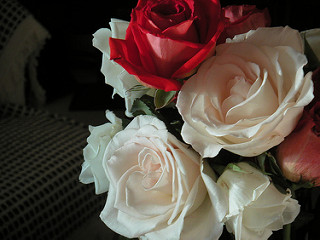

In [9]:
Image.open(str(roses[1]))

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [12]:
flowers_images_dict['roses'][:5]

[WindowsPath('Datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('Datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('Datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('Datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('Datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [13]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [14]:
img.shape

(240, 179, 3)

In [15]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [16]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [17]:
X = (np.array(X)/255.0).astype('float32')
y = np.array(y)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

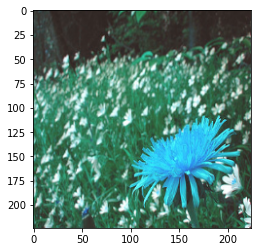

In [19]:
plt.imshow(X_train[0])

In [20]:
X_train.shape

(2752, 224, 224, 3)

In [21]:
#load pretrained model
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [22]:
#build the model
num_of_flowers = 5 #number of output labels

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(512),
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 512)               655872    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 2565      
Total params: 2,916,421
Trainable params: 658,437
Non-trainable params: 2,257,984
_________________________________________________________________


In [23]:
#compile the model
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

In [24]:
#train the model
model.fit(X_train, y_train, epochs=5, verbose=2)

Epoch 1/5
86/86 - 21s - loss: 0.7717 - acc: 0.7892
Epoch 2/5
86/86 - 17s - loss: 0.3032 - acc: 0.9026
Epoch 3/5
86/86 - 18s - loss: 0.2056 - acc: 0.9328
Epoch 4/5
86/86 - 19s - loss: 0.1357 - acc: 0.9549
Epoch 5/5
86/86 - 21s - loss: 0.1149 - acc: 0.9611


In [26]:
#evaluate the model
model.evaluate(X_test, y_test, batch_size=64, verbose=2)

15/15 - 8s - loss: 0.4854 - acc: 0.8747


[0.4853559136390686, 0.8747276663780212]

In [57]:
#predict the model
y_pred = model.predict(X_test)

In [58]:
y_pred[0]

array([-9.452238 , 11.161923 , -0.5910378,  3.779704 , -3.9638042],
      dtype=float32)

In [59]:
y_pred_labels = [np.argmax(pred) for pred in y_pred]

In [136]:
for i in y_test:
    y_test_flower_labels[i] = list(flowers_labels_dict.keys())[y_test[i]]

In [139]:
for i in y_pred_labels:
    y_pred_flower_labels[i] = list(flowers_labels_dict.keys())[y_pred_labels[i]]

In [147]:
y_pred_flower_labels[:5]

['daisy', 'tulips', 'dandelion', 'tulips', 'dandelion']

In [148]:
y_test_flower_labels[:5]

['daisy', 'roses', 'dandelion', 'tulips', 'dandelion']

In [146]:
y_test[:5]

array([1, 0, 2, 4, 2])

In [145]:
y_pred_labels[:5]

[1, 4, 2, 4, 2]